
## **Importing Libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split


##**Importing Data**
---



In [2]:
data=pd.read_csv('/content/drive/MyDrive/Credit_card_fruad/fraudTrain.csv')

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [3]:
data.drop_duplicates(inplace=True)

##**Exploratory Data Analysis**

###**1.Amount Vs Fruad**

In [6]:
data['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [7]:
np.percentile(data['amt'],99)

545.9926000000002

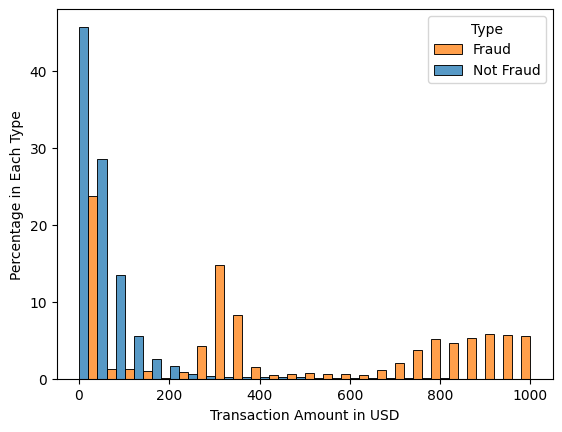

In [8]:
#amount vs fraud
ax=sns.histplot(x='amt',data=data[data.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

###**2.Gender Vs Fruad**

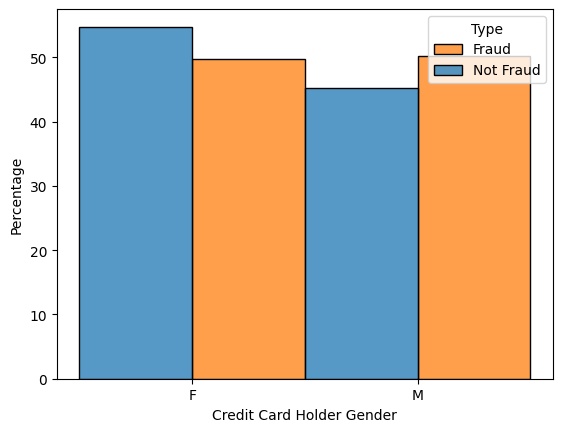

In [ ]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=data, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

###**3.Hourly Vs Fruad**

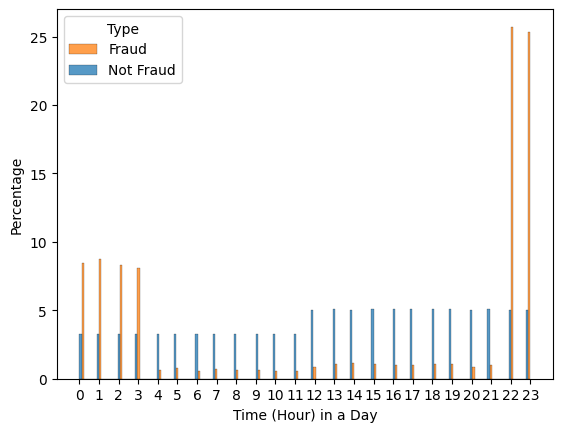

In [4]:
#time in a day vs fraud
data['hour']=pd.to_datetime(data['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=data, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

###**4.State vs Fruad**

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

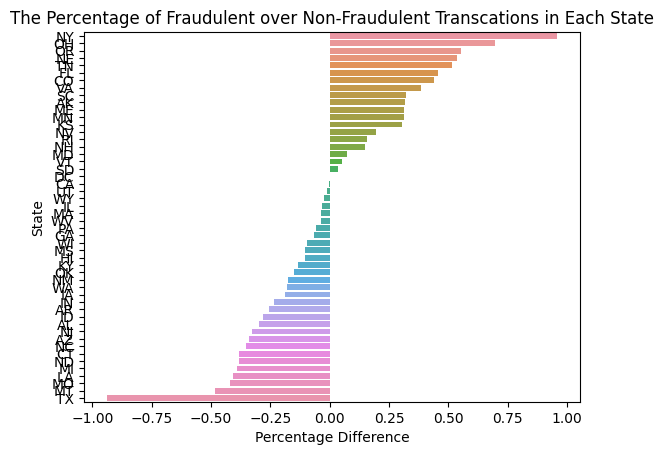

In [5]:
a=data['state'][data.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=data['state'][data.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

In [6]:
data['age']=dt.date.today().year-pd.to_datetime(data['dob']).dt.year

In [7]:
data['day']=pd.to_datetime(data['trans_date_trans_time']).dt.dayofweek

In [8]:
data['month']=pd.to_datetime(data['trans_date_trans_time']).dt.month

##**Data Modelling and Preprocessing**

In [9]:
train=data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#Converting into numericals

train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [15]:
train.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,...,1,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,...,0,0,0,0,0,1,0,0,0,0


In [10]:
test=pd.read_csv('/content/drive/MyDrive/Credit_card_fruad/fraudTest.csv')

In [11]:
test['age']=dt.date.today().year-pd.to_datetime(data['dob']).dt.year
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

##**Building The Model**

###Resampling The Dataset such that the number of fraudulant transactions increases

In [12]:
from imblearn.over_sampling import SMOTE


method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

###**1.Logistic Regression**

In [19]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\n\nShare of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[526263  27311]
 [   536   1609]]


Share of Non-Fraud in Test Data: 0.9961


###**Here F1 score is much low for predicting Fraudulant transaction eventough the accuacy is very high**

###**2.Decisopn Tree**

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\n\nShare of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.58      0.67      0.62      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.83      0.81    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552547   1027]
 [   712   1433]]


Share of Non-Fraud in Test Data: 0.9961


###**3.SGD Classifier**

In [20]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_resampled, y_resampled)

#Making Prediction and printing result
predicted_SGD=sgd.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted_SGD))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_SGD)
print('Confusion matrix:\n', conf_mat)
print('\n\nShare of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.67      0.05      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.78      0.50    555719
weighted avg       0.99      0.89      0.94    555719

Confusion matrix:
 [[495369  58205]
 [   708   1437]]


Share of Non-Fraud in Test Data: 0.9961


###**4.SVM**

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_resampled, y_resampled)


# Make Prediction & print the result
predicted_SVM = svc_classifier.predict(X_test)
print(classification_report(y_test,predicted_SVM))
conf_mat_SVM = confusion_matrix(y_true=y_test, y_pred=predicted_SVM)
print('\n\nConfusion matrix:\n', conf_mat_SVM)

## From above we can conclude that :
###Decision Tree gives highest F1 score for both fruadulent and non-Fruadulent transactions